Option Pricing: Vanilla Options
We assumme the log stock price $$S_t$$ follows the dynamic 
$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$
where $$W_t$$ is a Weiner process.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.fftpack import fft
import time
import numpy as np
from scipy.special import erf
import pandas as pd

In [6]:
# Parameters
S0 = 100  # Spot price
r = 0.01  # Risk-free rate
sigma = 0.2  # Volatility
K = np.arange(80, 125, 5)  # Strike prices
T = 1  # Maturity (1 year)

# Black-Scholes option pricing formula
def black_scholes(S0, K, r, T, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return call, put

In [32]:

# More parameters for Monte Carlo simulation
M = 10**4  # number of simulations
mu = r - 0.5 * sigma**2
nsteps = 1  # number of time steps
dt = T / nsteps  # time increment

# Start measuring time for Monte Carlo
start_time = time.time()

# Simulate the ABM (Arithmetic Brownian Motion) process
dW = mu * dt + sigma * np.sqrt(dt) * np.random.randn(nsteps, M)
X = np.vstack([np.zeros(M), np.cumsum(dW, axis=0)])

# Simulate the stock price
S = S0 * np.exp(X)

# Initialize arrays to store Monte Carlo prices and standard errors
mc_call_prices = []
mc_call_std = []
mc_time_vals = []

# Monte Carlo Simulation for different strike prices
for strike in K:
    # Simulate the contract payoff for call and put options
    CT = np.maximum(S[-1, :] - strike, 0)  # Call option payoff
    
    # Obtain the sample mean and discount to present value
    C0 = np.exp(-r * T) * np.mean(CT)
    
    # Store the call option price
    mc_call_prices.append(C0)
    
    # Calculate and store standard error for call option
    C_stderr = np.std(np.exp(-r * T) * CT) / np.sqrt(M)
    mc_call_std.append(C_stderr)
    mc_time_vals.append(time.time() - start_time)  # CPU time taken

# Convert results to NumPy arrays for easier plotting
mc_call_prices = np.array(mc_call_prices)
mc_call_std = np.array(mc_call_std)

# Time taken for Monte Carlo simulation
time_MC = time.time() - start_time
print(f"Monte Carlo Simulation Time: {time_MC:.4f} seconds")

Monte Carlo Simulation Time: 0.0076 seconds


In [8]:

# Closed-form solution (Black-Scholes)
start_time = time.time()
call_bs, put_bs = black_scholes(S0, K, r, T, sigma)
time_exact = time.time() - start_time
print(f"Black-Scholes execution time: {time_exact:.4f} seconds")


Black-Scholes execution time: 0.0063 seconds


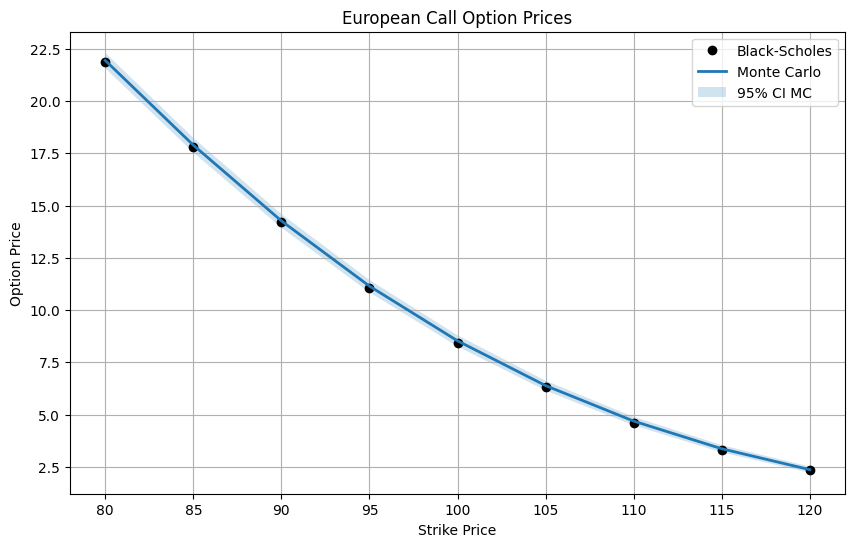

In [14]:
# Plot results for Call option
plt.figure(figsize=(10, 6))
plt.plot(K, call_bs, label='Black-Scholes', marker='o', linestyle='None', color='k')
plt.plot(K, mc_call_prices, label='Monte Carlo', linewidth=2)
plt.fill_between(K, mc_call_prices - 1.96 * mc_call_std, mc_call_prices + 1.96 * mc_call_std, 
                 alpha=0.2, label='95% CI MC')

plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European Call Option Prices')
plt.legend()
plt.grid(True)
plt.show()

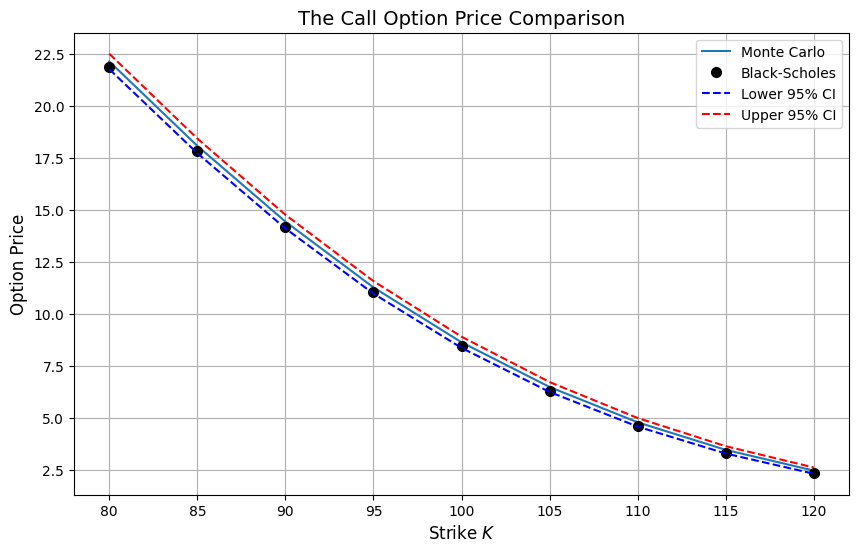

In [24]:
# New parameter for 95% confidence interval
alpha = 0.05 

# Calculate 95% Confidence Intervals for the Monte Carlo call option prices
C_CI_lb = mc_call_prices - norm.ppf(1 - 0.5 * alpha) * mc_call_std  # Lower bound
C_CI_ub = mc_call_prices + norm.ppf(1 - 0.5 * alpha) * mc_call_std  # Upper bound

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot Monte Carlo results
plt.plot(K, mc_call_prices, label='Monte Carlo', linewidth=1.5)

# Plot Black-Scholes results (as points)
plt.plot(K, call_bs, 'o', color='k', label='Black-Scholes', linewidth=1.5, markersize=7)

# Plot 95% Confidence Intervals
plt.plot(K, C_CI_lb, '--', color='blue', label='Lower 95% CI', linewidth=1.5)
plt.plot(K, C_CI_ub, '--', color='red', label='Upper 95% CI', linewidth=1.5)

# Labels and Title
plt.xlabel('Strike $K$', fontsize=12)
plt.ylabel('Option Price', fontsize=12)
plt.title('The Call Option Price Comparison', fontsize=14)

# Legend
plt.legend()

# Grid and display plot
plt.grid(True)
plt.show()

In [30]:
VarNames = ['K', 'BS Price', 'MC Price', 'Std. Error', '95% C.I. Low', '95% C.I. High']
Tab1 = pd.DataFrame({
    'K': K,
    'BS Price': call_bs,
    'MC Price': mc_call_prices,
    'Std. Error': mc_call_std,
    '95% C.I. Low': C_CI_lb,
    '95% C.I. High': C_CI_ub
})

# Print the table
print('Call Option Prices')
print(Tab1)

Call Option Prices
     K   BS Price   MC Price  Std. Error  95% C.I. Low  95% C.I. High
0   80  21.863306  22.126124    0.189171     21.755357      22.496892
1   85  17.812204  18.068627    0.179523     17.716768      18.420486
2   90  14.192920  14.428802    0.167353     14.100795      14.756809
3   95  11.060210  11.267062    0.153145     10.966903      11.567222
4  100   8.433319   8.628513    0.137466      8.359085       8.897941
5  105   6.297255   6.479872    0.121263      6.242201       6.717543
6  110   4.610115   4.782262    0.105233      4.576009       4.988515
7  115   3.313151   3.458531    0.090084      3.281969       3.635093
8  120   2.340649   2.461432    0.076149      2.312183       2.610681
